# Eta Spectra

## Setup

In [3]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import h5py

from hazma import decay
import utils
from utils import MK0, MPI, MPI0, MMU, ME, META
from utils import ThreeBodyPhaseSpace

from hazma.decay import charged_pion as dnde_cp
from hazma.decay import neutral_pion as dnde_np
from hazma.decay import muon as dnde_mu

In [2]:
# =========================================================
# ---- η Branching Ratios ---------------------------------
# =========================================================
                    
# BR(γ, γ) = (39.41±0.20) %
BR_ETA_TO_A_A =39.41e-2 
# BR(π0, π0, π0) = (32.68±0.23) %
BR_ETA_TO_PI0_PI0_PI0 =32.68e-2 
# BR(π+, π−, π0) = (22.92±0.28) %
BR_ETA_TO_PI_PI_PI0 =22.92e-2 
# BR(π+, π−, γ) = ( 4.22±0.08) %
BR_ETA_TO_PI_PI_A =4.22e-2 

# BR(π0, γ, γ) = ( 2.56±0.22)×10−4
BR_ETA_TO_PI0_A_A = 2.56e-4
# BR(e+, e−, γ) = ( 6.9±0.4 )×10−3
BR_ETA_TO_E_E_A = 6.9e-3
# BR(μ+, μ−, γ) = ( 3.1±0.4 )×10−4
BR_ETA_TO_MU_MU_A = 3.1e-4
# BR(μ+, μ−) = ( 5.8±0.8 )×10−6
BR_ETA_TO_MU_MU = 5.8e-6
# BR(π+, π−, e+, e−)  = ( 2.68±0.11)×10−4
BR_ETA_TO_PI_PI_E_E = 2.68e-4
# BR(e+, e−, e+, e−) = ( 2.40±0.22)×10−5
BR_ETA_TO_E_E_E_E = 2.40e-5

## Distributions

### $\eta \to \pi^{0} + \pi^{0} + \pi^{0}$

In ChiPT, this matrix element is constant (comes from mass term.)

In [4]:
tbps = ThreeBodyPhaseSpace(META, MPI0, MPI0, MPI0, lambda s, t: 1.0)
eta_to_pi0_pi0_pi0_edists = tbps.energy_distributions(25, maxiter=1000)
eta_to_pi0_pi0_pi0_s_dist = tbps.invariant_mass_distribution(1, 2, 25, maxiter=1000)
eta_to_pi0_pi0_pi0_t_dist = tbps.invariant_mass_distribution(0, 2, 25, maxiter=1000)
eta_to_pi0_pi0_pi0_u_dist = tbps.invariant_mass_distribution(0, 1, 25, maxiter=1000)

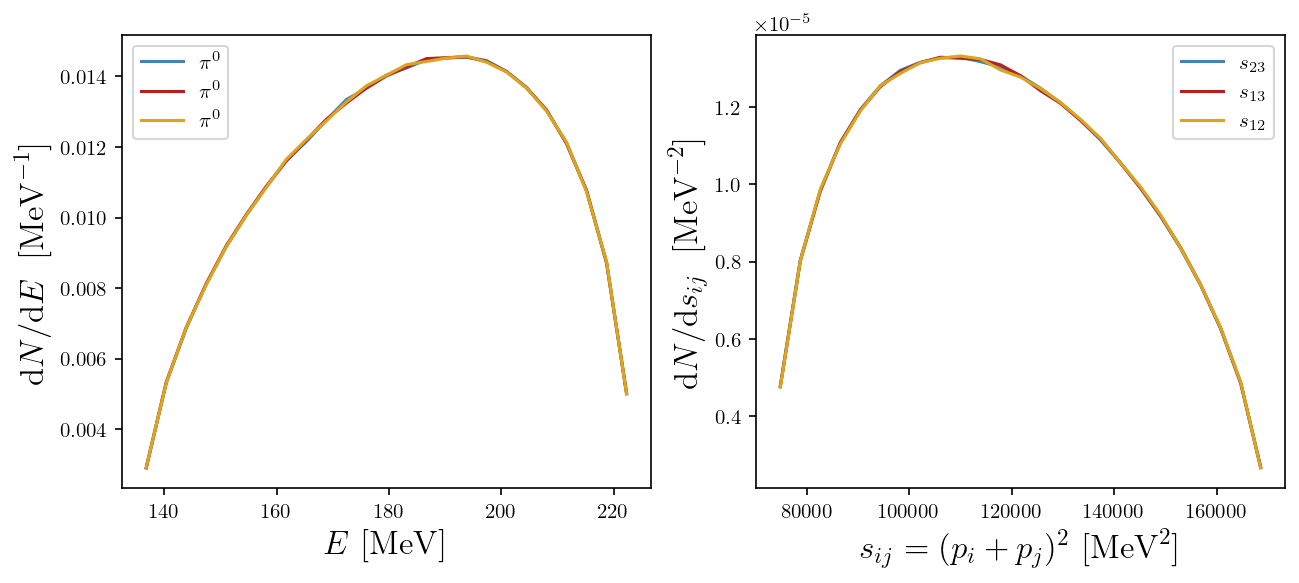

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(10,4))

labels = [r"$\pi^{0}$", r"$\pi^{0}$", r"$\pi^{0}$"]
for (cs, ps), label in zip(eta_to_pi0_pi0_pi0_edists, labels):
    axes[0].plot(cs, ps, label=label)

axes[0].legend()
axes[0].set_ylabel(r"$\dv*{N}{E} \ [\mathrm{MeV}^{-1}]$", fontdict={'size': 16})
axes[0].set_xlabel(r"$E \ [\mathrm{MeV}]$", fontdict={'size': 16})

labels = [r"$s_{23}$", r"$s_{13}$", r"$s_{12}$"]
dists = [eta_to_pi0_pi0_pi0_s_dist, eta_to_pi0_pi0_pi0_t_dist, eta_to_pi0_pi0_pi0_u_dist]
for (cs, ps), label in zip(dists, labels):
    axes[1].plot(cs, ps, label=label)

axes[1].set_ylabel(r"$\dv*{N}{s_{ij}} \ [\mathrm{MeV}^{-2}]$", fontdict={'size': 16})
axes[1].set_xlabel(r"$s_{ij} = (p_{i} + p_{j})^{2} \ [\mathrm{MeV}^{2}]$", fontdict={'size': 16})
axes[1].legend()

### $\eta \to \pi^{0} + \pi^{\pm} + \pi^{\mp}$

In ChiPT, this matrix element is constant (comes from mass term.)

In [5]:
tbps = ThreeBodyPhaseSpace(META, MPI0, MPI, MPI, lambda s, t: 1.0)
eta_to_pi0_pi_pi_edists = tbps.energy_distributions(25, maxiter=1000)
eta_to_pi0_pi_pi_s_dist = tbps.invariant_mass_distribution(1, 2, 25, maxiter=1000)
eta_to_pi0_pi_pi_t_dist = tbps.invariant_mass_distribution(0, 2, 25, maxiter=1000)
eta_to_pi0_pi_pi_u_dist = tbps.invariant_mass_distribution(0, 1, 25, maxiter=1000)

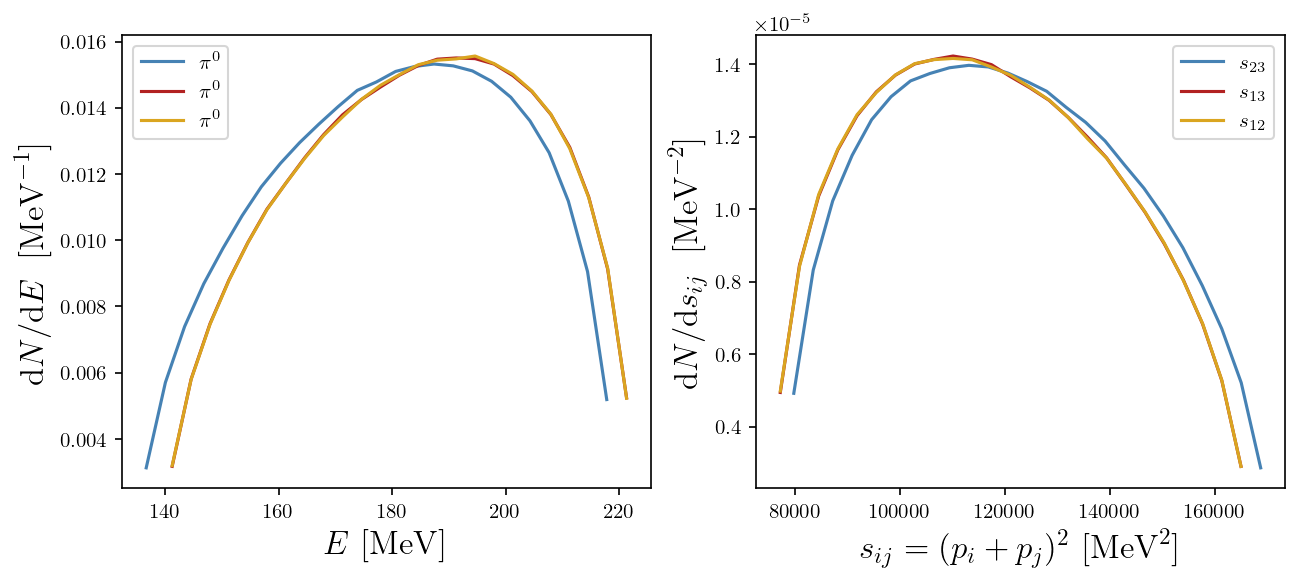

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=150, figsize=(10,4))

labels = [r"$\pi^{0}$", r"$\pi^{0}$", r"$\pi^{0}$"]
for (cs, ps), label in zip(eta_to_pi0_pi_pi_edists, labels):
    axes[0].plot(cs, ps, label=label)

axes[0].legend()
axes[0].set_ylabel(r"$\dv*{N}{E} \ [\mathrm{MeV}^{-1}]$", fontdict={'size': 16})
axes[0].set_xlabel(r"$E \ [\mathrm{MeV}]$", fontdict={'size': 16})

labels = [r"$s_{23}$", r"$s_{13}$", r"$s_{12}$"]
dists = [eta_to_pi0_pi_pi_s_dist, eta_to_pi0_pi_pi_t_dist, eta_to_pi0_pi_pi_u_dist]
for (cs, ps), label in zip(dists, labels):
    axes[1].plot(cs, ps, label=label)

axes[1].set_ylabel(r"$\dv*{N}{s_{ij}} \ [\mathrm{MeV}^{-2}]$", fontdict={'size': 16})
axes[1].set_xlabel(r"$s_{ij} = (p_{i} + p_{j})^{2} \ [\mathrm{MeV}^{2}]$", fontdict={'size': 16})
axes[1].legend()

### Save Data

In [8]:
with h5py.File(Path(os.getcwd()).joinpath("data").joinpath("eta_decay_data.hdf5"), "w") as f:
    # K -> pi + pi + pi
    root = f.create_group("/pi0_pi0_pi0")
    grp = root.create_group("energy_distributions")
    d1, d2, d3 = eta_to_pi0_pi0_pi0_edists
    sdist = eta_to_pi0_pi0_pi0_s_dist
    tdist = eta_to_pi0_pi0_pi0_t_dist
    udist = eta_to_pi0_pi0_pi0_u_dist

    grp.create_dataset("energies", data=np.vstack((d1[0], d2[0], d3[0])))
    grp.create_dataset("probabilities", data=np.vstack((d1[1], d2[1], d3[1])))

    grp = root.create_group("invariant_mass_distributions/s")
    grp.create_dataset("invariant_masses", data=sdist[0])
    grp.create_dataset("probabilities", data=sdist[1])

    grp = root.create_group("invariant_mass_distributions/t")
    grp.create_dataset("invariant_masses", data=tdist[0])
    grp.create_dataset("probabilities", data=tdist[1])
    
    grp = root.create_group("invariant_mass_distributions/u")
    grp.create_dataset("invariant_masses", data=udist[0])
    grp.create_dataset("probabilities", data=udist[1])

    # KL -> pi0 + pi + pi
    root = f.create_group("/pi0_pi_pi")
    grp = root.create_group("energy_distributions")
    d1, d2, d3 = eta_to_pi0_pi_pi_edists
    sdist = eta_to_pi0_pi_pi_s_dist
    tdist = eta_to_pi0_pi_pi_t_dist
    udist = eta_to_pi0_pi_pi_u_dist

    grp.create_dataset("energies", data=np.vstack((d1[0], d2[0], d3[0])))
    grp.create_dataset("probabilities", data=np.vstack((d1[1], d2[1], d3[1])))

    grp = root.create_group("invariant_mass_distributions/s")
    grp.create_dataset("invariant_masses", data=sdist[0])
    grp.create_dataset("probabilities", data=sdist[1])

    grp = root.create_group("invariant_mass_distributions/t")
    grp.create_dataset("invariant_masses", data=tdist[0])
    grp.create_dataset("probabilities", data=tdist[1])
    
    grp = root.create_group("invariant_mass_distributions/u")
    grp.create_dataset("invariant_masses", data=udist[0])
    grp.create_dataset("probabilities", data=udist[1])

## Spectra

In [10]:
class EtaSpectra:

    def __init__(self):
        file = Path(os.getcwd()).joinpath("data").joinpath("eta_decay_data.hdf5")
        with h5py.File(file, "r") as f:
            self._edists = {
                "pi0 pi0 pi0": {
                    "e": f["/pi0_pi0_pi0/energy_distributions/energies"][:],
                    "dnde": f["/pi0_pi0_pi0/energy_distributions/probabilities"][:],
                },
                "pi0 pi pi": {
                    "e": f["/pi0_pi_pi/energy_distributions/energies"][:],
                    "dnde": f["/pi0_pi_pi/energy_distributions/probabilities"][:],
                },
            }
            self._invariant_mass_dists = {
                "pi0 pi0 pi0": {
                    "s":    f["/pi0_pi0_pi0/invariant_mass_distributions/s/invariant_masses"][:],
                    "t":    f["/pi0_pi0_pi0/invariant_mass_distributions/t/invariant_masses"][:],
                    "u":    f["/pi0_pi0_pi0/invariant_mass_distributions/u/invariant_masses"][:],
                    "dnds": f["/pi0_pi0_pi0/invariant_mass_distributions/s/probabilities"][:],
                    "dndt": f["/pi0_pi0_pi0/invariant_mass_distributions/t/probabilities"][:],
                    "dndu": f["/pi0_pi0_pi0/invariant_mass_distributions/u/probabilities"][:],
                },
                "pi0 pi pi": {
                    "s":    f["/pi0_pi_pi/invariant_mass_distributions/s/invariant_masses"][:],
                    "t":    f["/pi0_pi_pi/invariant_mass_distributions/t/invariant_masses"][:],
                    "u":    f["/pi0_pi_pi/invariant_mass_distributions/u/invariant_masses"][:],
                    "dnds": f["/pi0_pi_pi/invariant_mass_distributions/s/probabilities"][:],
                    "dndt": f["/pi0_pi_pi/invariant_mass_distributions/t/probabilities"][:],
                    "dndu": f["/pi0_pi_pi/invariant_mass_distributions/u/probabilities"][:],
                },
            }


    def dnde_photon_pi0_pi0_pi0(self, e):
        res = np.zeros_like(e)
        dists = self._edists["pi0 pi0 pi0"]
        res += utils.convolve(e, dnde_np, dists["e"][0], dists["dnde"][0])
        res += utils.convolve(e, dnde_np, dists["e"][1], dists["dnde"][1])
        res += utils.convolve(e, dnde_np, dists["e"][2], dists["dnde"][2])
        
        return res

    def dnde_photon_pi0_pi_pi(self, e):
        key = "pi0 pi pi"

        res = np.zeros_like(e)
        dists = self._edists[key]
        res += utils.convolve(e, dnde_np, dists["e"][0], dists["dnde"][0])
        res += utils.convolve(e, dnde_cp, dists["e"][1], dists["dnde"][1])
        res += utils.convolve(e, dnde_cp, dists["e"][2], dists["dnde"][2])

        # Average FSR over s, t and u channels 
        fsr = lambda x, y: utils.dnde_photon_fsr_scalar(x, y, MPI, q=1.0)
        inv_dist = self._invariant_mass_dists[key]
        res += 0.5 * utils.convolve(e, fsr, inv_dist["s"], inv_dist["dnds"])
        res += 0.5 * utils.convolve(e, fsr, inv_dist["t"], inv_dist["dndt"])
        res += 0.5 * utils.convolve(e, fsr, inv_dist["u"], inv_dist["dndu"])

        return res


    def dnde_photon(self, e, components=False):
        pi0_pi0_pi0 = BR_ETA_TO_PI0_PI0_PI0 * self.dnde_photon_pi0_pi0_pi0(e)
        pi0_pi_pi = BR_ETA_TO_PI_PI_PI0 * self.dnde_photon_pi0_pi_pi(e)

        if components:
            return {
                "pi0 pi0 pi0": pi0_pi0_pi0,
                "pi0 pi pi": pi0_pi_pi,
            }
        return pi0_pi0_pi0 + pi0_pi_pi

/home/logan/github/Hazma/hazma/decay.py:208: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return decay_charged_pion.charged_pion_decay_spectrum(
/home/logan/github/Hazma/notebooks/decay_spectra/utils.py:63: RuntimeWarning: invalid value encountered in log
  np.e * m ** 2 / s > xm, 0.0, 2.0 * xm / x * (np.log(s * xm / m ** 2) - 1.0)


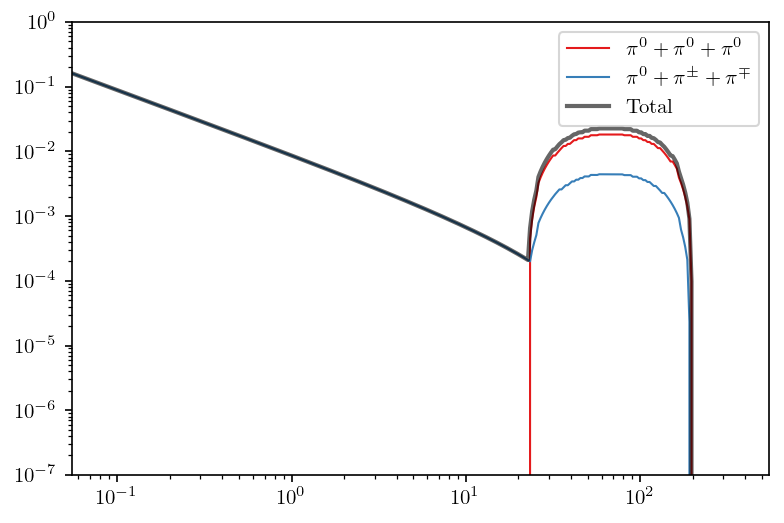

In [17]:
labels = {
    "pi0 pi0 pi0" : r"$\pi^{0} + \pi^{0} + \pi^{0}$",
    "pi0 pi pi" : r"$\pi^{0} + \pi^{\pm} + \pi^{\mp}$",
    "total": r"$\mathrm{Total}$"
}

plot_params = {
    "pi0 pi0 pi0" : {"c": utils.qualitative[0], "lw": 1},
    "pi0 pi pi" : {"c": utils.qualitative[1], "lw": 1},
    "total": {"c": "k", "lw": 2, "alpha": 0.6},
}

es = META * np.geomspace(1e-6, 1.0, 500)
dnde_ck = EtaSpectra().dnde_photon(es, components=True)

plt.figure(dpi=150)

for key, val in dnde_ck.items():
    plt.plot(es, val, label=labels[key], **plot_params[key])
plt.plot(es, sum(dnde_ck.values()), label=labels["total"], **plot_params["total"])



plt.ylim(1e-7, 1e0)
plt.xlim(np.max(es) * 1e-4, np.max(es))
plt.yscale("log")
plt.xscale("log")
plt.legend()

In [15]:
es = META * np.geomspace(1e-6, 1.0, 500)
dnde_eta = sum(EtaSpectra().dnde_photon(es, components=True).values())

s = slice(0, np.argwhere(dnde_eta <= 0)[0,0])
data = np.array([es[s], dnde_eta[s]]).T

np.savetxt(Path(os.getcwd()).joinpath("data").joinpath("eta_dnde_photon.csv"), data, delimiter=",", header="energy, dnde")